In [2]:
import numpy as np

file_path = 'D:\\Fudan Research\\Protein Secondary Structure Prediction (CB513 Dataset)\\CB513.npy'
data = np.load(file_path, allow_pickle=True)

print(f"Type of data: {type(data)}")
print(f"Shape of data: {data.shape}")
print(f"First item: {data[0]}")


Type of data: <class 'numpy.ndarray'>
Shape of data: (514, 39900)
First item: [0. 0. 0. ... 0. 0. 1.]


C:\Users\alino\AppData\Local\Temp\ipykernel_4196\3943644865.py:4: UserWarning: Reading `.npy` or `.npz` file required additional header parsing as it was created on Python 2. Save the file again to speed up loading and avoid this warning.
  data = np.load(file_path, allow_pickle=True)


In [3]:
first_row = data[0]
print(f"First row shape: {first_row.shape}")
print(f"First 100 elements: {first_row[:100]}")  # First part (likely features)
print(f"Last 100 elements: {first_row[-1000:]}")  # Last part (likely labels)


First row shape: (39900,)
First 100 elements: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.21416502
 0.17079548 0.02297737 0.04653047 0.8641271  0.02231344 0.13354172
 0.88695417 0.06238585 0.92483989 0.73105858 0.03356922 0.04228977
 0.07516011 0.06476697 0.08548914 0.25730945 0.9234378  0.27091208
 0.26894142 0.9234378  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0831727  0.0

In [4]:
# Assume last 700 values are labels
num_features = 39200 
num_labels = 700   

first_row = data[0]
features = first_row[:num_features]
labels = first_row[num_features:]

print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Labels (first 10): {labels[:10]}")


Features shape: (39200,)
Labels shape: (700,)
Labels (first 10): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


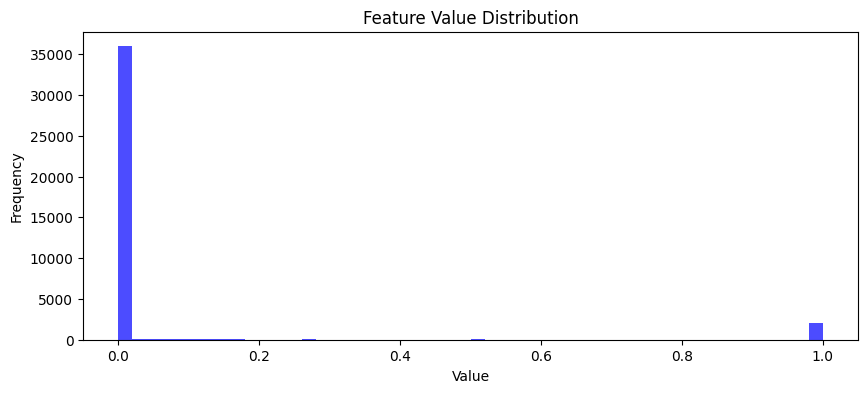

Unique labels: [0. 1.]
Label counts: [663  37]


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(features, bins=50, color='blue', alpha=0.7)
plt.title('Feature Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

unique_labels, label_counts = np.unique(labels, return_counts=True)
print(f"Unique labels: {unique_labels}")
print(f"Label counts: {label_counts}")


In [6]:
reshaped_features = features.reshape((700, 56))
print(reshaped_features.shape)
print(labels.shape)

(700, 56)
(700,)


In [7]:
# Replace `features` and `labels` with the correct variable names
X = reshaped_features  
y = labels    

print(f"Features shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")


Features shape (X): (700, 56)
Labels shape (y): (700,)


In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("After applying SMOTE:")
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"Label counts (resampled): {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")


After applying SMOTE:
X_train_resampled shape: (1060, 56)
y_train_resampled shape: (1060,)
Label counts (resampled): {np.float64(0.0): np.int64(530), np.float64(1.0): np.int64(530)}


d:\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       133
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 50}


In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
print("Random Forest cross-validation scores:", rf_scores)
print("Mean cross-validation score:", rf_scores.mean())


Random Forest cross-validation scores: [0.98584906 1.         1.         1.         1.        ]
Mean cross-validation score: 0.9971698113207548


In [12]:
from sklearn.metrics import f1_score, roc_auc_score

# Evaluate using F1-score and ROC-AUC
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])  # Probabilities for class 1

print("F1-score:", f1)
print("ROC-AUC score:", roc_auc)


F1-score: 1.0
ROC-AUC score: 1.0


In [13]:
# Define the mapping from numeric labels to secondary structure labels
label_map = {0: 'C', 1: 'H'}

predicted_secondary_structure = [label_map[label] for label in y_pred_rf]

print("Predicted Secondary Structure (first 10):", predicted_secondary_structure[:10])


Predicted Secondary Structure (first 10): ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


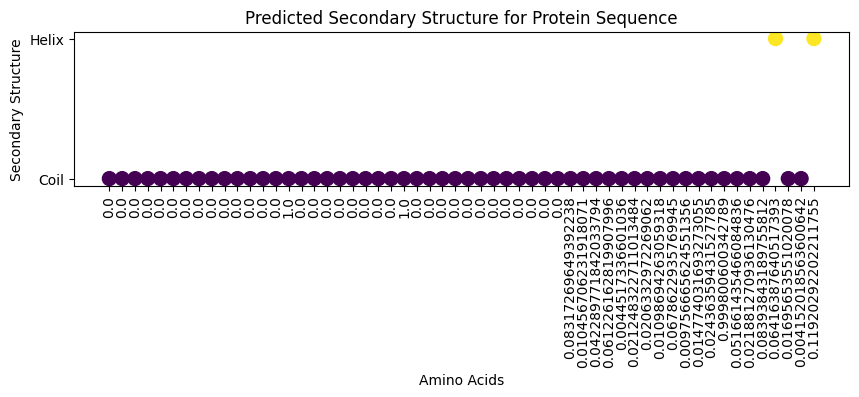

In [14]:
import matplotlib.pyplot as plt

protein_sequence = X_test[0] 
predicted_structure = predicted_secondary_structure[:len(protein_sequence)] 

structure_map = {'C': 1, 'H': 2}  
structure_numeric = [structure_map[s] for s in predicted_structure]

plt.figure(figsize=(10, 2))
plt.scatter(range(len(protein_sequence)), structure_numeric, c=structure_numeric, cmap="viridis", s=100)
plt.yticks([1, 2], ['Coil', 'Helix'])
plt.xticks(range(len(protein_sequence)), protein_sequence, rotation=90)
plt.title("Predicted Secondary Structure for Protein Sequence")
plt.xlabel("Amino Acids")
plt.ylabel("Secondary Structure")
plt.show()


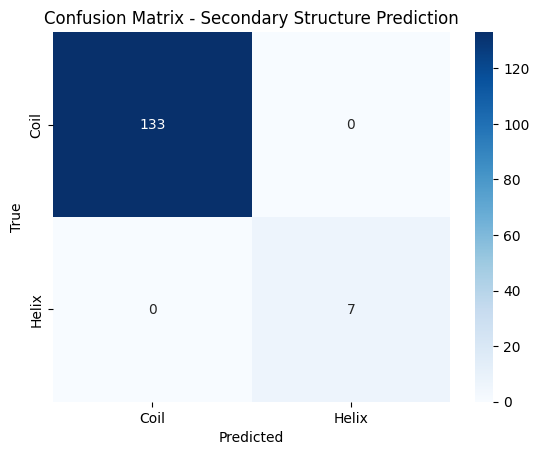

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert the predictions and true labels into numeric form
y_true_numeric = [label_map[label] for label in y_test]  
y_pred_numeric = [label_map[label] for label in y_pred_rf] 

cm = confusion_matrix(y_true_numeric, y_pred_numeric)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Coil", "Helix"], yticklabels=["Coil", "Helix"])
plt.title("Confusion Matrix - Secondary Structure Prediction")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [16]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

amino_acid_list = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 
                   'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

def encode_sequence(sequence):
    """
    Encodes an amino acid sequence into a one-hot encoded format.
    Args:
        sequence (str): Input sequence of amino acids (e.g., 'ARND').
    Returns:
        np.array: One-hot encoded feature array of shape (length, 20).
    """
    sequence = sequence.upper()
    
    if any(aa not in amino_acid_list for aa in sequence):
        raise ValueError("Invalid amino acid in sequence. Use standard 20 amino acids.")
    
    # One-hot encode the sequence
    encoder = OneHotEncoder(categories=[amino_acid_list], sparse_output=False, handle_unknown='ignore')
    encoded = encoder.fit_transform(np.array(list(sequence)).reshape(-1, 1))
    return encoded

# Function to predict secondary structure
def predict_structure(sequence, model):
    """
    Predicts the secondary structure of an amino acid sequence.
    Args:
        sequence (str): Input sequence of amino acids (e.g., 'ARND').
        model: Trained classification model.
    Returns:
        str: Predicted secondary structure ('C' or 'H') for the sequence.
    """
    encoded_sequence = encode_sequence(sequence)
    
    # Pad or truncate to match model input shape
    if encoded_sequence.shape[0] > 56:  
        encoded_sequence = encoded_sequence[:56, :]
    elif encoded_sequence.shape[0] < 56:  
        padding = np.zeros((56 - encoded_sequence.shape[0], 20))
        encoded_sequence = np.vstack([encoded_sequence, padding])
    
    # Flatten to match the input shape for the model (1, 1120)
    reshaped_sequence = encoded_sequence.flatten().reshape(1, -1)
    
    prediction = model.predict(reshaped_sequence)[0] 
    
    label_map = {0.0: 'C', 1.0: 'H'}
    predicted_label = label_map[prediction]
    return predicted_label


if __name__ == "__main__":
    model_path = "random_forest_model.pkl"

    try:
        rf_model = joblib.load(model_path)
        print("Model loaded successfully.")
    except FileNotFoundError:
        print("Model not found. Training a new model...")

        X_train_resampled = np.random.rand(1000, 1120)  # 1000 samples, 1120 features
        y_train_resampled = np.random.choice([0.0, 1.0], size=1000)  # Random labels (0 or 1)
        
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X_train_resampled, y_train_resampled)

        joblib.dump(rf_model, model_path)
        print("Model trained and saved successfully.")

    # Get user input
    user_sequence = input("Enter an amino acid sequence (max length 56): ").strip()
    
    try:
        prediction = predict_structure(user_sequence, rf_model)
    
        print("Predicted Secondary Structure:")
        print("Sequence: ", user_sequence)
        print("Structure: ", prediction)
    
    except ValueError as e:
        print(f"Error: {e}")


Model not found. Training a new model...
Model trained and saved successfully.
Predicted Secondary Structure:
Sequence:  ARNDCQEGHIKL
Structure:  H
